In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv('cardekho.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [2]:
# renamed this column to aid the prediction
df.rename(columns={"mileage(km/ltr/kg)" : "mileage"}, inplace= True)

In [3]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


In [4]:
df.shape

(8128, 12)

In [5]:
# checking for null values
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [6]:
df.fuel.value_counts()

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

In [7]:
# Extracting the years to the current date(now)
from datetime import date

#creating the date object of today's date
todays_date = date.today()
print(todays_date)

df["Car_Age"]=todays_date.year-df['year']
df.head()


2025-02-01


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Car_Age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0,18


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7913 non-null   object 
 11  seats          7907 non-null   float64
 12  Car_Age        8128 non-null   int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 825.6+ KB


In [9]:
# checking for duplicated values
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8123    False
8124    False
8125    False
8126     True
8127     True
Length: 8128, dtype: bool

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8121    False
8122    False
8123    False
8124    False
8125    False
Length: 6926, dtype: bool

In [12]:
df.describe()

,year,selling_price,km_driven,mileage,engine,seats,Car_Age
count,6926.000000,6.926000e+03,6.926000e+03,6718.00000,6718.000000,6718.000000,6926.000000
mean,2013.420300,5.172707e+05,7.399568e+04,19.46531,1430.891337,5.434653,11.579700
std,4.078286,5.197670e+05,5.835810e+04,4.04915,493.493277,0.984230,4.078286
min,1983.000000,2.999900e+04,1.000000e+00,0.00000,624.000000,2.000000,5.000000
25%,2011.000000,2.500000e+05,4.000000e+04,16.80000,1197.000000,5.000000,8.000000
50%,2014.000000,4.000000e+05,7.000000e+04,19.44000,1248.000000,5.000000,11.000000
75%,2017.000000,6.335000e+05,1.000000e+05,22.50000,1498.000000,5.000000,14.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.00000,3604.000000,14.000000,42.000000


In [13]:
# replacing empty spaces with "NAN"
df[["mileage", "engine", "max_power", "seats"]] = df[["mileage", "engine", "max_power", "seats"]].replace(' ', np.nan)

In [14]:
# Changing the type to float
df[["mileage", "engine", "max_power", "seats"]] = df[["mileage", "engine", "max_power", "seats"]].astype(float)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6926 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6926 non-null   object 
 1   year           6926 non-null   int64  
 2   selling_price  6926 non-null   int64  
 3   km_driven      6926 non-null   int64  
 4   fuel           6926 non-null   object 
 5   seller_type    6926 non-null   object 
 6   transmission   6926 non-null   object 
 7   owner          6926 non-null   object 
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   float64
 10  max_power      6720 non-null   float64
 11  seats          6718 non-null   float64
 12  Car_Age        6926 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 757.5+ KB


In [16]:
# Missing values found
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          208
engine           208
max_power        206
seats            208
Car_Age            0
dtype: int64

In [17]:
# Replacing the missing values with median
missing = ["mileage", "engine", "max_power", "seats"]
for i in missing:
    df[i].fillna(df[i].median(), inplace=True)

In [18]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
Car_Age          0
dtype: int64

In [19]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Car_Age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0,12
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0,11
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,12
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,18


In [20]:
# Dropping useless coumns
df = df.drop(columns=['name', 'owner','seller_type','year','mileage'])

In [21]:
df

,selling_price,km_driven,fuel,transmission,engine,max_power,seats,Car_Age
0,450000,145500,Diesel,Manual,1248.0,74.00,5.0,11
1,370000,120000,Diesel,Manual,1498.0,103.52,5.0,11
2,158000,140000,Petrol,Manual,1497.0,78.00,5.0,19
3,225000,127000,Diesel,Manual,1396.0,90.00,5.0,15
4,130000,120000,Petrol,Manual,1298.0,88.20,5.0,18
...,...,...,...,...,...,...,...,...
8121,260000,50000,Petrol,Manual,998.0,67.10,5.0,12
8122,475000,80000,Diesel,Manual,1396.0,88.73,5.0,11
8123,320000,110000,Petrol,Manual,1197.0,82.85,5.0,12
8124,135000,119000,Diesel,Manual,1493.0,110.00,5.0,18


In [22]:
# Moved the Selling_price column (y) to the end
col_move = df.pop('selling_price')
df['selling_price'] = col_move

df

,km_driven,fuel,transmission,engine,max_power,seats,Car_Age,selling_price
0,145500,Diesel,Manual,1248.0,74.00,5.0,11,450000
1,120000,Diesel,Manual,1498.0,103.52,5.0,11,370000
2,140000,Petrol,Manual,1497.0,78.00,5.0,19,158000
3,127000,Diesel,Manual,1396.0,90.00,5.0,15,225000
4,120000,Petrol,Manual,1298.0,88.20,5.0,18,130000
...,...,...,...,...,...,...,...,...
8121,50000,Petrol,Manual,998.0,67.10,5.0,12,260000
8122,80000,Diesel,Manual,1396.0,88.73,5.0,11,475000
8123,110000,Petrol,Manual,1197.0,82.85,5.0,12,320000
8124,119000,Diesel,Manual,1493.0,110.00,5.0,18,135000


In [23]:
le = LabelEncoder()
categoricals = ["fuel",	"transmission",]
for i in categoricals:
    df[i] = le.fit_transform(df[i])

df

,km_driven,fuel,transmission,engine,max_power,seats,Car_Age,selling_price
0,145500,1,1,1248.0,74.00,5.0,11,450000
1,120000,1,1,1498.0,103.52,5.0,11,370000
2,140000,3,1,1497.0,78.00,5.0,19,158000
3,127000,1,1,1396.0,90.00,5.0,15,225000
4,120000,3,1,1298.0,88.20,5.0,18,130000
...,...,...,...,...,...,...,...,...
8121,50000,3,1,998.0,67.10,5.0,12,260000
8122,80000,1,1,1396.0,88.73,5.0,11,475000
8123,110000,3,1,1197.0,82.85,5.0,12,320000
8124,119000,1,1,1493.0,110.00,5.0,18,135000


In [24]:
corr_mat = df.corr()
corr_mat

,km_driven,fuel,transmission,engine,max_power,seats,Car_Age,selling_price
km_driven,1.000000,-0.271970,0.118658,0.246746,0.039490,0.200999,0.377003,-0.165620
fuel,-0.271970,1.000000,-0.028296,-0.505851,-0.298547,-0.343142,0.067323,-0.241328
transmission,0.118658,-0.028296,1.000000,-0.218925,-0.438180,0.017219,0.140995,-0.462683
engine,0.246746,-0.505851,-0.218925,1.000000,0.683027,0.659422,0.001064,0.444760
max_power,0.039490,-0.298547,-0.438180,0.683027,1.000000,0.260458,-0.158769,0.688838
seats,0.200999,-0.343142,0.017219,0.659422,0.260458,1.000000,-0.042275,0.163942
Car_Age,0.377003,0.067323,0.140995,0.001064,-0.158769,-0.042275,1.000000,-0.433076
selling_price,-0.165620,-0.241328,-0.462683,0.444760,0.688838,0.163942,-0.433076,1.000000


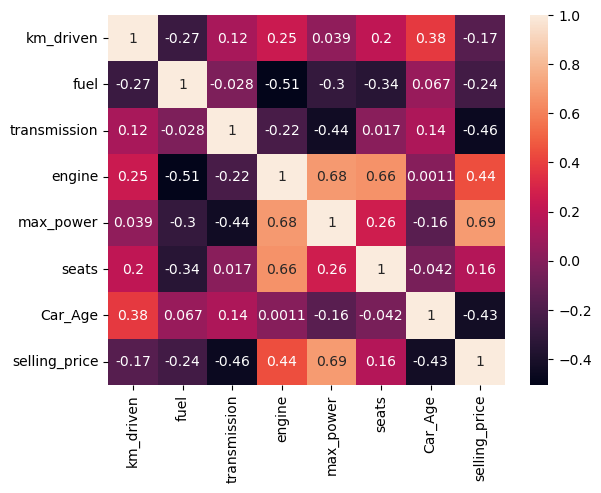

In [25]:
sns.heatmap(corr_mat, annot=True)
plt.show()

In [26]:
# Correlation threshold for 30% and above
threshold = 0.3
filtered_corr = corr_mat[(corr_mat >= threshold)]
filtered_corr

,km_driven,fuel,transmission,engine,max_power,seats,Car_Age,selling_price
km_driven,1.000000,NaN,NaN,NaN,NaN,NaN,0.377003,NaN
fuel,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
transmission,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
engine,NaN,NaN,NaN,1.000000,0.683027,0.659422,NaN,0.444760
max_power,NaN,NaN,NaN,0.683027,1.000000,NaN,NaN,0.688838
seats,NaN,NaN,NaN,0.659422,NaN,1.000000,NaN,NaN
Car_Age,0.377003,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
selling_price,NaN,NaN,NaN,0.444760,0.688838,NaN,NaN,1.000000


In [27]:
df

,km_driven,fuel,transmission,engine,max_power,seats,Car_Age,selling_price
0,145500,1,1,1248.0,74.00,5.0,11,450000
1,120000,1,1,1498.0,103.52,5.0,11,370000
2,140000,3,1,1497.0,78.00,5.0,19,158000
3,127000,1,1,1396.0,90.00,5.0,15,225000
4,120000,3,1,1298.0,88.20,5.0,18,130000
...,...,...,...,...,...,...,...,...
8121,50000,3,1,998.0,67.10,5.0,12,260000
8122,80000,1,1,1396.0,88.73,5.0,11,475000
8123,110000,3,1,1197.0,82.85,5.0,12,320000
8124,119000,1,1,1493.0,110.00,5.0,18,135000


In [28]:
# Saving the cleaned dataset
df.to_csv("cleaned_data.csv")

In [29]:
df

,km_driven,fuel,transmission,engine,max_power,seats,Car_Age,selling_price
0,145500,1,1,1248.0,74.00,5.0,11,450000
1,120000,1,1,1498.0,103.52,5.0,11,370000
2,140000,3,1,1497.0,78.00,5.0,19,158000
3,127000,1,1,1396.0,90.00,5.0,15,225000
4,120000,3,1,1298.0,88.20,5.0,18,130000
...,...,...,...,...,...,...,...,...
8121,50000,3,1,998.0,67.10,5.0,12,260000
8122,80000,1,1,1396.0,88.73,5.0,11,475000
8123,110000,3,1,1197.0,82.85,5.0,12,320000
8124,119000,1,1,1493.0,110.00,5.0,18,135000


### Model Building

In [30]:
numerical_cols = ['km_driven','fuel','transmission','engine', 'max_power', 'seats','Car_Age']
scaler = MinMaxScaler()

# Applying MinMaxScaler
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the scaled DataFrame
print(df)

      km_driven      fuel  transmission    engine  max_power  seats   Car_Age  \
0      0.061640  0.333333           1.0  0.209396   0.185000   0.25  0.162162   
1      0.050837  0.333333           1.0  0.293289   0.258800   0.25  0.162162   
2      0.059310  1.000000           1.0  0.292953   0.195000   0.25  0.378378   
3      0.053803  0.333333           1.0  0.259060   0.225000   0.25  0.270270   
4      0.050837  1.000000           1.0  0.226174   0.220500   0.25  0.351351   
...         ...       ...           ...       ...        ...    ...       ...   
8121   0.021182  1.000000           1.0  0.125503   0.167750   0.25  0.189189   
8122   0.033891  0.333333           1.0  0.259060   0.221825   0.25  0.162162   
8123   0.046601  1.000000           1.0  0.192282   0.207125   0.25  0.189189   
8124   0.050414  0.333333           1.0  0.291611   0.275000   0.25  0.351351   
8125   0.050837  0.333333           1.0  0.209396   0.184750   0.25  0.297297   

      selling_price  
0    

In [31]:
X = df.drop(['selling_price'],axis=1)
X

,km_driven,fuel,transmission,engine,max_power,seats,Car_Age
0,0.061640,0.333333,1.0,0.209396,0.185000,0.25,0.162162
1,0.050837,0.333333,1.0,0.293289,0.258800,0.25,0.162162
2,0.059310,1.000000,1.0,0.292953,0.195000,0.25,0.378378
3,0.053803,0.333333,1.0,0.259060,0.225000,0.25,0.270270
4,0.050837,1.000000,1.0,0.226174,0.220500,0.25,0.351351
...,...,...,...,...,...,...,...
8121,0.021182,1.000000,1.0,0.125503,0.167750,0.25,0.189189
8122,0.033891,0.333333,1.0,0.259060,0.221825,0.25,0.162162
8123,0.046601,1.000000,1.0,0.192282,0.207125,0.25,0.189189
8124,0.050414,0.333333,1.0,0.291611,0.275000,0.25,0.351351


In [32]:
y = df['selling_price']
y

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8121    260000
8122    475000
8123    320000
8124    135000
8125    382000
Name: selling_price, Length: 6926, dtype: int64

In [33]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state= 42)

In [34]:
X_train

,km_driven,fuel,transmission,engine,max_power,seats,Car_Age
5586,0.010591,0.333333,1.0,0.293289,0.247400,0.25,0.054054
3468,0.072020,1.000000,1.0,0.209396,0.204575,0.25,0.270270
4935,0.031985,0.333333,1.0,0.259060,0.225000,0.25,0.243243
2485,0.058463,0.333333,1.0,0.209396,0.184750,0.25,0.297297
4491,0.084729,0.333333,1.0,0.291611,0.205000,0.25,0.459459
...,...,...,...,...,...,...,...
4286,0.038128,1.000000,1.0,0.226510,0.175000,0.25,0.405405
5986,0.030079,1.000000,1.0,0.192282,0.212500,0.25,0.297297
6021,0.023828,1.000000,1.0,0.192282,0.214500,0.25,0.216216
6268,0.006163,1.000000,1.0,0.192282,0.204500,0.25,0.027027


In [35]:
y_train

5586    900000
3468    120000
4935    395000
2485    185000
4491    108000
         ...  
4286    120000
5986    229999
6021    369000
6268    595000
914     710000
Name: selling_price, Length: 5540, dtype: int64

In [36]:
X_test

,km_driven,fuel,transmission,engine,max_power,seats,Car_Age
8077,0.105911,0.333333,1.0,0.627517,0.25500,0.416667,0.297297
4094,0.016522,0.333333,1.0,0.521812,0.35000,0.416667,0.135135
6493,0.038128,0.333333,1.0,0.293289,0.24740,0.250000,0.054054
4339,0.042364,1.000000,1.0,0.146644,0.16000,0.250000,0.324324
2535,0.016945,0.333333,1.0,0.293289,0.24650,0.250000,0.054054
...,...,...,...,...,...,...,...
4484,0.040670,0.333333,1.0,0.280872,0.20950,0.250000,0.189189
1018,0.008473,1.000000,1.0,0.192953,0.21000,0.250000,0.081081
1681,0.027537,1.000000,1.0,0.057718,0.11825,0.250000,0.108108
1595,0.023724,1.000000,1.0,0.292953,0.29325,0.250000,0.162162


In [37]:
y_test

8077     550000
4094    1225000
6493     850000
4339      80000
2535     825000
         ...   
4484     400000
1018     520000
1681     260000
1595     650000
7097     700000
Name: selling_price, Length: 1386, dtype: int64

In [38]:
models=[]
cv_scores=[]
r2_scores=[]


### GRID SCEARCHCV

#### Ridge Regression

In [39]:
parameters = {'alpha':[0.0001,0.001,0.01,0.1]}        
c1 = Ridge()
grid = GridSearchCV(c1, parameters, cv=10)
grid.fit(X_train,y_train)
pred = grid.best_estimator_.predict(X_test)

r2 =r2_score(y_test,pred)
mse = mean_squared_error(y_test,pred)

print("Best Paramters:", grid.best_params_)
print("Best Estimator:", grid.best_estimator_)
print("Best Cross-Validation Score:", grid.best_score_)
print("MSE: ", mse)
print("r2: ", r2)


models.append(str(grid.best_estimator_))   #models[c1]
cv_scores.append(grid.best_score_) #scores[0.8853679599908248]
r2_scores.append(r2)

Best Paramters: {'alpha': 0.1}
Best Estimator: Ridge(alpha=0.1)
Best Cross-Validation Score: 0.6210736132108047
MSE:  95561493806.30562
r2:  0.5642860456513574


#### Lasso Regression

In [40]:
parameters = {'alpha':[0.0001,0.001,0.01,0.1]}        
c2 = Lasso()
grid = GridSearchCV(c2, parameters, cv=10)
grid.fit(X_train,y_train)
pred = grid.best_estimator_.predict(X_test)

r2 = r2_score(y_test,pred)
mse = mean_squared_error(y_test,pred)

print("Best Paramters:", grid.best_params_)
print("Best Estimator:", grid.best_estimator_)
print("Best Cross-Validation Score:", grid.best_score_)
print("MSE: ", mse)
print("r2: ", r2)

models.append(str(grid.best_estimator_))   #models[c1,c2]
cv_scores.append(grid.best_score_)   #scores[0.8863844264592868]
r2_scores.append(r2)

Best Paramters: {'alpha': 0.1}
Best Estimator: Lasso(alpha=0.1)
Best Cross-Validation Score: 0.6208759757280025
MSE:  96029623326.03494
r2:  0.5621516026234781


#### Desicion Tree Regressor

In [41]:
parameters = {'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
              'splitter':['best', 'random']
              }                  
c3 = DecisionTreeRegressor()
grid = GridSearchCV(c3, parameters, cv=10)
grid.fit(X_train,y_train)
pred = grid.best_estimator_.predict(X_test)

r2 = r2_score(y_test,pred)
mse = mean_squared_error(y_test,pred)

print("Best Paramters:", grid.best_params_)
print("Best Estimator:", grid.best_estimator_)
print("Best Cross-Validation Score:", grid.best_score_)
print("MSE: ", mse)
print("r2: ", r2)

models.append(str(grid.best_estimator_))   #models[c1]
cv_scores.append(grid.best_score_)   #scores[0.8863844264592868]()
r2_scores.append(r2)

Best Paramters: {'criterion': 'absolute_error', 'splitter': 'random'}
Best Estimator: DecisionTreeRegressor(criterion='absolute_error', splitter='random')
Best Cross-Validation Score: 0.825480998011758
MSE:  28956727047.063854
r2:  0.8679714020351788


#### Support Vector Regressor

In [42]:
parameters = {'C': [0.01, 0.05],
              'degree': [2, 3],
              'gamma':[0.001, 0.01],
              'kernel': ['rbf']
              }        
c4 = SVR()
grid = GridSearchCV(c4, parameters, cv=10)
grid.fit(X_train,y_train)
pred = grid.best_estimator_.predict(X_test)

r2 = r2_score(y_test,pred)
mse = mean_squared_error(y_test,pred)

print("Best Paramters:", grid.best_params_)
print("Best Estimator:", grid.best_estimator_)
print("Best Cross-Validation Score:", grid.best_score_)
print("MSE: ", mse)
print("r2: ", r2)

models.append(str(grid.best_estimator_))   #models[c1,c2,c3]
cv_scores.append(grid.best_score_)
r2_scores.append(r2)

Best Paramters: {'C': 0.05, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
Best Estimator: SVR(C=0.05, degree=2, gamma=0.01)
Best Cross-Validation Score: -0.052417311718948326
MSE:  229405628249.22168
r2:  -0.04597813881921042


#### KNeighbors Regressor

In [43]:
parameters = {'n_neighbors': range(30),
              'metric':['manhattan','euclidean']}        
c5 = KNeighborsRegressor()  
grid = GridSearchCV(c5, parameters, cv=10)
grid.fit(X_train,y_train)
pred = grid.best_estimator_.predict(X_test)

r2 = r2_score(y_test,pred)
mse = mean_squared_error(y_test,pred)

print("Best Paramters:", grid.best_params_)
print("Best Estimator:", grid.best_estimator_)
print("Best Cross-Validation Score:", grid.best_score_)
print("MSE: ", mse)
print("r2: ", r2)

models.append(str(grid.best_estimator_))     #models[c1,c2,c3,c4]
cv_scores.append(grid.best_score_)
r2_scores.append(r2)

Best Paramters: {'metric': 'manhattan', 'n_neighbors': 2}
Best Estimator: KNeighborsRegressor(metric='manhattan', n_neighbors=2)
Best Cross-Validation Score: 0.8620663077997056
MSE:  41983226497.99098
r2:  0.8085768973972723


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\USER\anaconda3\Lib\site-packages\skle

#### Random Forest Regressor

In [44]:
parameters = {'n_estimators':range(1,20),
              'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson']}        
c6 = RandomForestRegressor()  
grid = GridSearchCV(c6, parameters, cv=10)
grid.fit(X_train,y_train)
pred = grid.best_estimator_.predict(X_test)

r2 = r2_score(y_test,pred)
mse = mean_squared_error(y_test,pred)

print("Best Paramters:", grid.best_params_)
print("Best Estimator:", grid.best_estimator_)
print("Best Cross-Validation Score:", grid.best_score_)
print("MSE: ", mse)
print("r2: ", r2)


models.append(str(grid.best_estimator_))      #models[c1,c2,c3,c4,c5]
cv_scores.append(grid.best_score_) 
r2_scores.append(r2)

Best Paramters: {'criterion': 'absolute_error', 'n_estimators': 19}
Best Estimator: RandomForestRegressor(criterion='absolute_error', n_estimators=19)
Best Cross-Validation Score: 0.8897880719822154
MSE:  23040378140.79236
r2:  0.8949470768031229


#### Linear Regression

In [45]:
parameters = {'fit_intercept':[True,False]}        
c7 = LinearRegression(n_jobs=-1)  
grid = GridSearchCV(c7, parameters, cv=10)
grid.fit(X_train,y_train)
pred = grid.best_estimator_.predict(X_test)

print("Best Paramters:", grid.best_params_)
print("Best Estimator:", grid.best_estimator_)
print("Best Cross-Validation Score:", grid.best_score_)
print("MSE: ", mse)
print("r2: ", r2)

models.append(str(grid.best_estimator_))      #models[c1,c2,c3,c4,c5]
cv_scores.append(grid.best_score_)
r2_scores.append(r2)

Best Paramters: {'fit_intercept': True}
Best Estimator: LinearRegression(n_jobs=-1)
Best Cross-Validation Score: 0.6208756995895919
MSE:  23040378140.79236
r2:  0.8949470768031229


#### Ada Boost Regressor

In [46]:
parameters = {'n_estimators': [50, 100, 150, 200]}        
c8 = AdaBoostRegressor()  
grid = GridSearchCV(c8, parameters, cv=10)
grid.fit(X_train,y_train)
pred = grid.best_estimator_.predict(X_test)

print("Best Paramters:", grid.best_params_)
print("Best Estimator:", grid.best_estimator_)
print("Best Cross-Validation Score:", grid.best_score_)
print("MSE: ", mse)
print("r2: ", r2)

models.append(str(grid.best_estimator_))      #models[c1,c2,c3,c4,c5]
cv_scores.append(grid.best_score_)
r2_scores.append(r2)

Best Paramters: {'n_estimators': 150}
Best Estimator: AdaBoostRegressor(n_estimators=150)
Best Cross-Validation Score: 0.6370645477558728
MSE:  23040378140.79236
r2:  0.8949470768031229


#### Gradient Boosting Regressor

In [47]:
parameters = {'n_estimators': [50, 100, 150, 200]}        
c9 = GradientBoostingRegressor()  
grid = GridSearchCV(c9, parameters, cv=10)
grid.fit(X_train,y_train)
pred = grid.best_estimator_.predict(X_test)

print("Best Paramters:", grid.best_params_)
print("Best Estimator:", grid.best_estimator_)
print("Best Cross-Validation Score:", grid.best_score_)
print("MSE: ", mse)
print("r2: ", r2)


models.append(str(grid.best_estimator_))      #models[c1,c2,c3,c4,c5]
cv_scores.append(grid.best_score_)
r2_scores.append(r2)

Best Paramters: {'n_estimators': 200}
Best Estimator: GradientBoostingRegressor(n_estimators=200)
Best Cross-Validation Score: 0.8950902647008272
MSE:  23040378140.79236
r2:  0.8949470768031229


In [48]:
result_data=pd.DataFrame({"Models":models,"CV_Score":cv_scores, "R2_Score":r2_scores})

In [56]:
result_data

,Models,CV_Score,R2_Score
0,Ridge(alpha=0.1),0.621074,0.564286
1,Lasso(alpha=0.1),0.620876,0.562152
2,DecisionTreeRegressor(criterion='absolute_erro...,0.825481,0.867971
3,"SVR(C=0.05, degree=2, gamma=0.01)",-0.052417,-0.045978
4,"KNeighborsRegressor(metric='manhattan', n_neig...",0.862066,0.808577
5,RandomForestRegressor(criterion='absolute_erro...,0.889788,0.894947
6,LinearRegression(n_jobs=-1),0.620876,0.894947
7,AdaBoostRegressor(n_estimators=150),0.637065,0.894947
8,GradientBoostingRegressor(n_estimators=200),0.895090,0.894947


### Conclusion

#### 💡 Performance-related factors (MAX POWER, ENGINE SIZE) significantly influence selling price. 
##### 💡 If a car has a POWERFUL ENGINE, it is more likely to be priced higher.
##### 💡 Larger vehicles with more SEATS may also hold better value, but the impact is not as strong.

In [50]:
df

,km_driven,fuel,transmission,engine,max_power,seats,Car_Age,selling_price
0,0.061640,0.333333,1.0,0.209396,0.185000,0.25,0.162162,450000
1,0.050837,0.333333,1.0,0.293289,0.258800,0.25,0.162162,370000
2,0.059310,1.000000,1.0,0.292953,0.195000,0.25,0.378378,158000
3,0.053803,0.333333,1.0,0.259060,0.225000,0.25,0.270270,225000
4,0.050837,1.000000,1.0,0.226174,0.220500,0.25,0.351351,130000
...,...,...,...,...,...,...,...,...
8121,0.021182,1.000000,1.0,0.125503,0.167750,0.25,0.189189,260000
8122,0.033891,0.333333,1.0,0.259060,0.221825,0.25,0.162162,475000
8123,0.046601,1.000000,1.0,0.192282,0.207125,0.25,0.189189,320000
8124,0.050414,0.333333,1.0,0.291611,0.275000,0.25,0.351351,135000


In [57]:
df.to_csv("cleaned_car_prediction_project.csv",index=False)